In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
path = '../data/insurance.csv'

In [4]:
df = pd.read_csv(path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
X = df.drop(columns='charges')
y = df['charges']

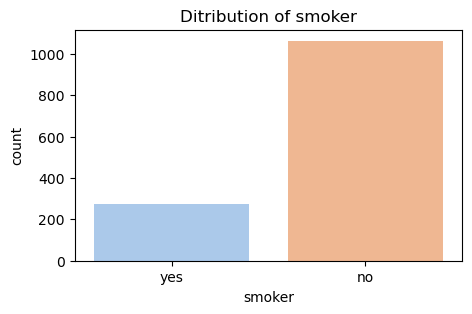

In [9]:
plt.figure(figsize=(5,3))
plt.title("Ditribution of smoker")

sns.countplot(data=df, x="smoker", palette='pastel')

plt.show()

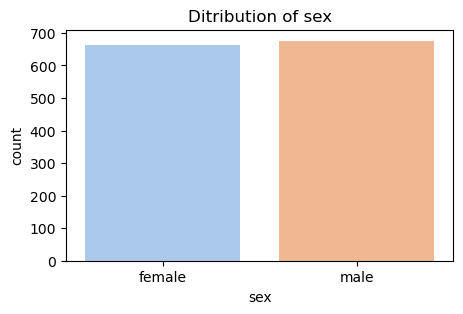

In [10]:
plt.figure(figsize=(5,3))
plt.title("Ditribution of sex")

sns.countplot(data=df, x="sex", palette='pastel')

plt.show()

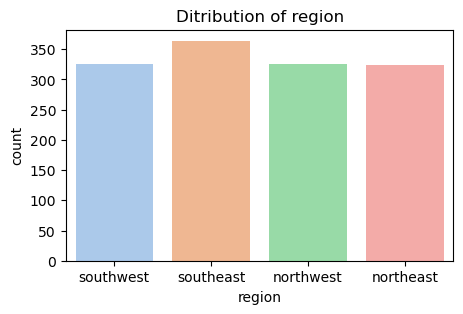

In [11]:
plt.figure(figsize=(5,3))
plt.title("Ditribution of region")

sns.countplot(data=df, x="region", palette='pastel')

plt.show()

In [12]:
cat_cols = [col for col in X.columns if X[col].dtype == 'O' ]

num_cols = [col for col in X.columns if X[col].dtype != 'O' ]

In [13]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

In [15]:
ohe = OneHotEncoder(drop='first' , dtype=np.int32)

scale = StandardScaler()

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
    ('encoder' , ohe , cat_cols),
    ('scale' , scale , num_cols)
] ,
    remainder='passthrough'
                                )

In [17]:
X_train_transformed = preprocessor.fit_transform( X_train )

X_test_transformed = preprocessor.transform( X_test )

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [20]:
# Define models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [21]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)

    # Cross-validation with multiple metrics on training data
    scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
    
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

    print(f"Model: {name}")
    print(f"  CV Mean R²: {np.mean(cv_results['test_r2']):.3f} (+/- {np.std(cv_results['test_r2']):.3f})")
    print(f"  CV Mean MAE: {-np.mean(cv_results['test_neg_mean_absolute_error']):.3f} (+/- {np.std(cv_results['test_neg_mean_absolute_error']):.3f})")
    print(f"  CV Mean RMSE: {np.sqrt(-np.mean(cv_results['test_neg_mean_squared_error'])):.3f} (+/- {np.std(cv_results['test_neg_mean_squared_error']):.3f})")

    # Test set evaluation
    test_r2 = r2_score( y_test , y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"  Test R²: {test_r2:.3f}")
    print(f"  Test MAE: {test_mae:.3f}")
    print(f"  Test RMSE: {test_rmse:.3f}\n")

Model: Linear Regression
  CV Mean R²: 0.736 (+/- 0.052)
  CV Mean MAE: 4231.158 (+/- 217.783)
  CV Mean RMSE: 6141.575 (+/- 4466574.983)
  Test R²: 0.767
  Test MAE: 4243.654
  Test RMSE: 5926.024

Model: Ridge Regression
  CV Mean R²: 0.736 (+/- 0.051)
  CV Mean MAE: 4242.481 (+/- 214.364)
  CV Mean RMSE: 6141.671 (+/- 4393259.370)
  Test R²: 0.767
  Test MAE: 4256.228
  Test RMSE: 5929.622

Model: Lasso Regression
  CV Mean R²: 0.736 (+/- 0.052)
  CV Mean MAE: 4231.143 (+/- 217.764)
  CV Mean RMSE: 6141.552 (+/- 4466567.920)
  Test R²: 0.767
  Test MAE: 4243.697
  Test RMSE: 5926.048

Model: Random Forest
  CV Mean R²: 0.821 (+/- 0.044)
  CV Mean MAE: 2864.433 (+/- 225.818)
  CV Mean RMSE: 5053.652 (+/- 4565116.539)
  Test R²: 0.848
  Test MAE: 2636.398
  Test RMSE: 4788.210

Model: Gradient Boosting
  CV Mean R²: 0.844 (+/- 0.044)
  CV Mean MAE: 2634.494 (+/- 233.830)
  CV Mean RMSE: 4706.252 (+/- 4935277.265)
  Test R²: 0.861
  Test MAE: 2543.159
  Test RMSE: 4579.838



In [22]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [23]:
model.fit(X_train_transformed ,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [24]:
y_pred = model.predict( X_test_transformed )

In [25]:
mean_absolute_error( y_test , y_pred )

2543.1590329421065

In [26]:
r2_score(y_test , y_pred)

0.8609930691632004

In [27]:
import joblib

In [30]:
# Assuming your trained pipeline is named 'pipeline'

joblib.dump( model, '../saved_models/insurance_premium_model.pkl' )
joblib.dump( preprocessor, '../saved_models/preprocessor.pkl' )

['../saved_models/preprocessor.pkl']

In [31]:
# load the model

loaded_model = joblib.load('../saved_models/insurance_premium_model.pkl')

loaded_preprocessor = joblib.load('../saved_models/preprocessor.pkl')

# predict new instance

def predict_new():
    new_instance = {
        
    "age":10,
    "sex":"male",
    "bmi":10.900,
    "children":0,
    "smoker":"no",
    "region":"southwest"
        
    }
    
    new_df = pd.DataFrame([new_instance])
    new_instance_transformed = loaded_preprocessor.transform( new_df )
    print( loaded_model.predict( new_instance_transformed ) )

predict_new()

[1057.56299211]
